# Barnes-Hut Method for N-body Simulation


In [41]:

%load_ext autoreload
%autoreload 2
import numpy as np
from modules.Particle import Particle
from modules.BH_Classes import BH
from modules.Analytic_Classes import SingleParticle
import copy
import modules.Utility as util
import matplotlib.pyplot as plt
n_particles = 5000
max_mass = 1E-100
box_size = 1000
theta=200
initial_positions = np.random.random((n_particles,3)) * box_size
initial_particles = []
print(len(initial_particles))
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_mass)))

single_particle_position = np.array([0.5,0.5,0.5])*box_size
single_particle_property = 1
initial_particles.append(Particle(single_particle_position, single_particle_property))




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0


In [42]:
bh_particles = copy.deepcopy(initial_particles)
bh_simulation = BH(box_size, bh_particles, theta=theta)
bh_simulation.run()

analytic_particles = copy.deepcopy(initial_particles)
analytic_simulation = SingleParticle(single_particle_position, single_particle_property, box_size)
analytic_simulation.evaluate_particle_acceleration(analytic_particles)

initial particles 5001
system init particles 5001
before loading root cell 0
17109
64
432
2840
11536
4096
512
64
8
1
root cell 5001


[0.0007416454780011526, 0.00028953709421179275, 0.0002823668251631384, 0.00025324527008158495, 0.00022262218673031216, 0.0001625066309207056, 0.00015873500165967418, 0.00015268314444182482, 0.0001477174450665102, 0.00013561339235986325, 0.00011224017315165813, 0.0001024547375972615, 9.309539141966803e-05, 9.16043064246689e-05, 8.872610105874826e-05, 8.607300592626771e-05, 8.348609232247167e-05, 8.325498788926509e-05, 8.153746789941258e-05, 7.929539600605297e-05, 7.750583132625142e-05, 7.506934882720987e-05, 7.07291068135515e-05, 6.937523487838435e-05, 6.937424697423131e-05, 6.908287866982418e-05, 6.517530515386578e-05, 6.419165646494651e-05, 6.300401907454816e-05, 6.285637798533086e-05, 6.170170400658543e-05, 6.0764074495741745e-05, 6.020671528882274e-05, 5.943337859874449e-05, 5.9093619425818396e-05, 5.826859114853824e-05, 5.767721595538245e-05, 5.680113394369301e-05, 5.571311479548065e-05, 5.50649501495775e-05, 5.484618682741679e-05, 5.2855420271220373e-05, 5.252604857970985e-05, 5.2

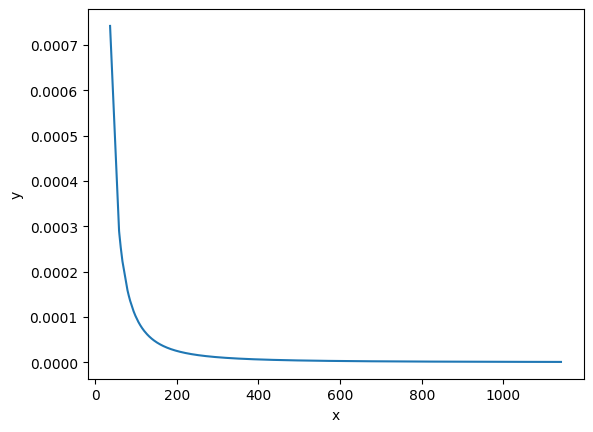

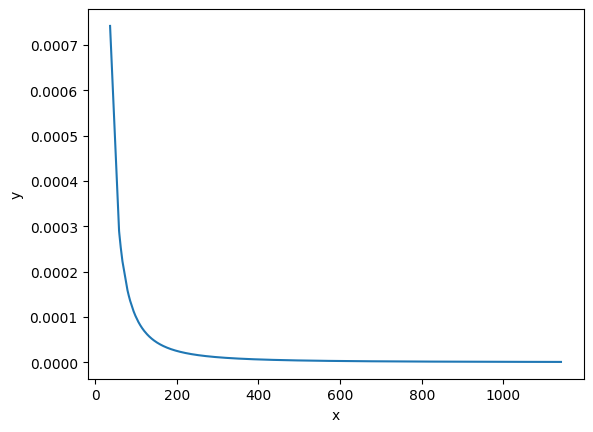

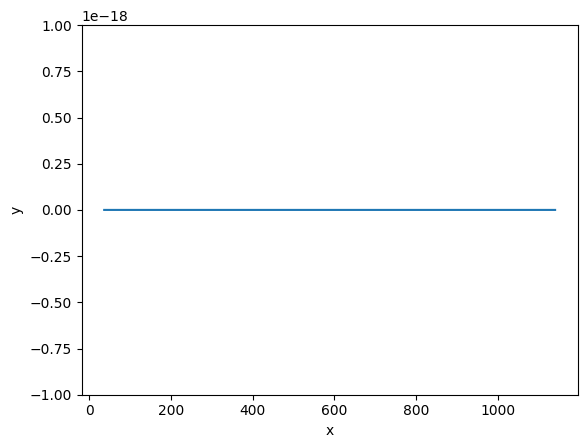

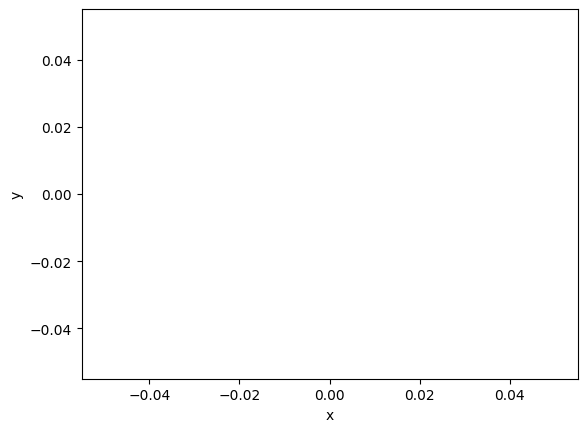

In [45]:
single_particle_fig, single_particle_axs = plt.subplots(3)
bh_results = util.calc_3D_results(bh_particles, single_particle_position, plotting=True, fig=single_particle_fig, ax=single_particle_axs[0], title="BH Single Particle Acceleration", x_label="Radius", y_label="Acceleration")
analytic_results = util.calc_3D_results(analytic_particles, single_particle_position, plotting=True, , fig=single_particle_fig, ax=single_particle_axs[1], title="Analytic Single Particle Acceleration", x_label="Radius", y_label="Acceleration")
bh_analytic_results = util.calc_3D_difference_results(bh_particles, analytic_particles, single_particle_position, True, fig=single_particle_fig, ax=single_particle_axs[2], y_range=[-1E-18, 1E-18], title="Difference between Single Particle BH and Analytic Accelerations", x_label="Radius", y_label="Acceleration")
#log_bh_analytic_results = util.calc_3D_relative_error_results(bh_particles, analytic_particles, single_particle_position, True)
bh_results.fig
plt.show()
analytic_results.fig
plt.show()
log_bh_analytic_results.fig
plt.show()
